# Price monitoring bounds

This notebook aims to visualise how price monitoring bounds are derived from the underlying risk model and how various parameters affect them.

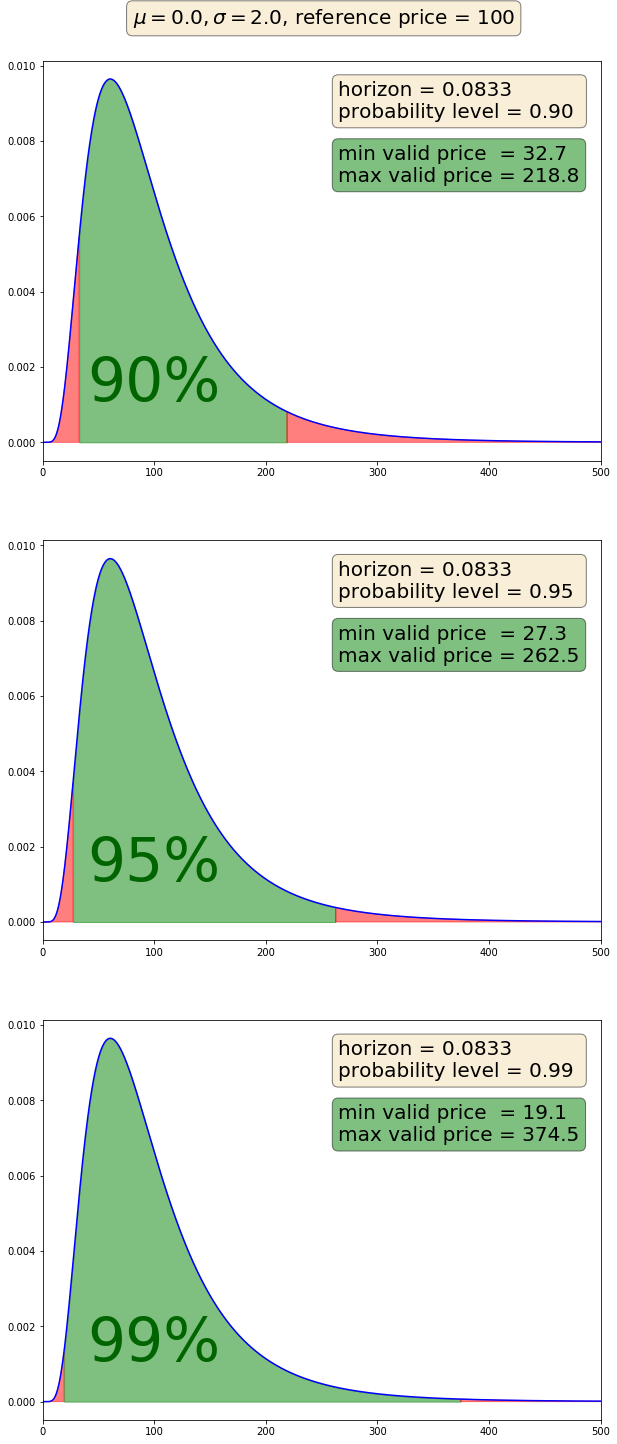

In [132]:
import enum
from statistics import stdev
from scipy.stats import lognorm
import math
import numpy as np
import matplotlib.pyplot as plt
from utils.helpers import *
from tabulate import tabulate


# model parameters
mu = 0
sigma = 2
# price monitoring triggers
year_fraction = 1.0 / 12
probability_levels=[0.9, 0.95, 0.99]
# market
reference_price = 100.0

m = math.log(reference_price) + (mu-0.5*sigma*sigma)*year_fraction
stddev = sigma * math.sqrt(year_fraction)
dist=lognorm(s=stddev,scale=math.exp(m))

fig, axs = plt.subplots(nrows=len(probability_levels), ncols=1, figsize=(10,25))
fig.text(0.25, 0.91, "$\mu={:.1f}, \sigma={:.1f}$, reference price = {:.0f}".format(mu, sigma, reference_price), fontsize=20, verticalalignment='top', ha="left", bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

def plot(distribution, prob, ax):
    
    q = (1 - prob) / 2
    min_price = dist.ppf(q)
    max_price = dist.ppf(prob + q)

    x=np.linspace(0,3*max_price,10000).flatten()
    y = dist.pdf(x)
    ax.plot(x, y, color='blue')

    valid_prices = np.logical_and(x >= min_price, x <= max_price)
    ax.fill_between(x, 0, y, where=valid_prices,color='green', alpha=0.5)
    ax.fill_between(x, 0, y, where=np.logical_not(valid_prices),color='red', alpha=0.5)

    ax.text(0.20, 0.19, f'{int(prob*100)}%', horizontalalignment='center',
        verticalalignment='center', transform=ax.transAxes, fontsize=60, color='darkgreen')

    textstr = '\n'.join((
        "horizon = %.4f" % (year_fraction, ),
        "probability level = %.2f " % (prob, )))
    ax.text(0.53, 0.95, textstr, transform=ax.transAxes, fontsize=20,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    textstr2 = '\n'.join((
        "min valid price  = %.1f" % (min_price, ),
        "max valid price = %.1f" % (max_price, )))
    ax.text(0.53, 0.79, textstr2, transform=ax.transAxes, fontsize=20,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='green', alpha=0.5))

    return min_price, max_price

for i, p in enumerate(probability_levels):
    if len(probability_levels) == 1:  
        plot(dist, p, axs)
        axs.set_xlim([0,500])
    else:
        plot(dist, p, axs[i])
        axs[i].set_xlim([0,500])

plt.show()
# fig.savefig('distribution.png', dpi=100)